<a href="https://colab.research.google.com/github/miguelrendon107/Analitica/blob/main/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO 3**

# Libreria y Datos

Los datos incluyen:

- Enroll (1= si hizo la compra; 0= si no hace la compra)
- Age (Edad)
- Income (Ingreso anual del asistente)
- Hours (Cantidad promedio de horas que hace ejercicio por semana)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

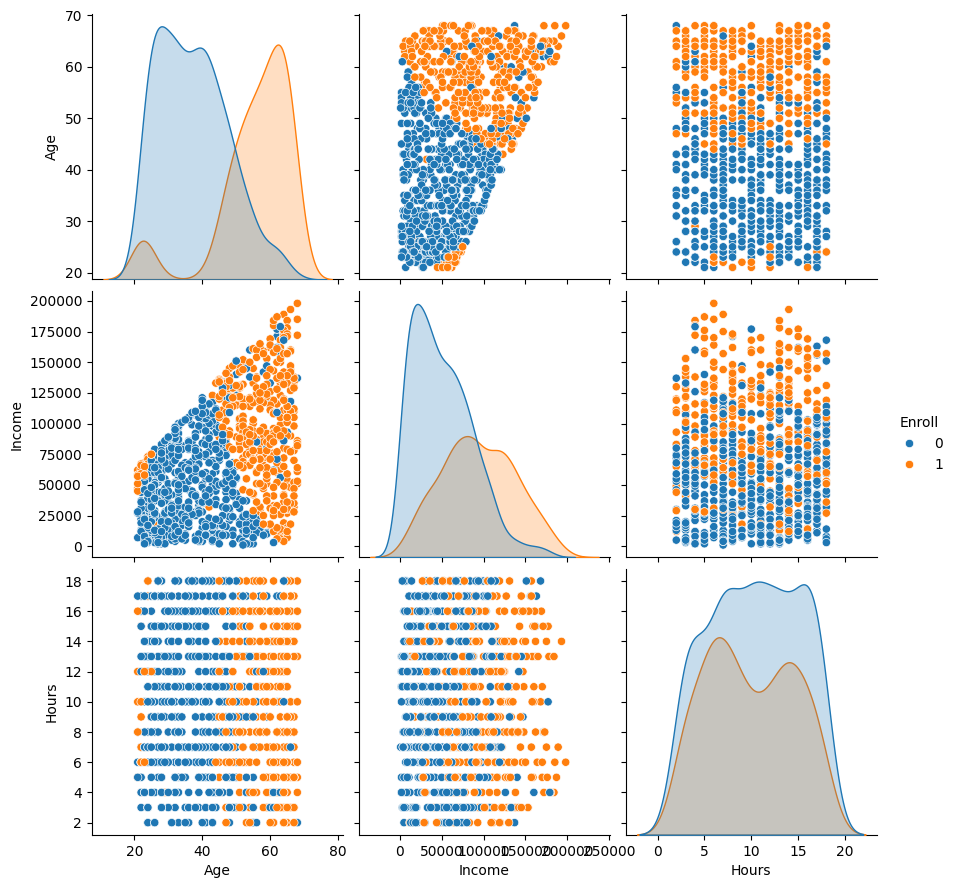

In [ ]:
d="/content/3. BD1-GymData_Int.xlsx"
d=pd.read_excel(d)
d=d.dropna()

dx= d[['Age', 'Income', 'Hours', 'Enroll']]

sns.pairplot(dx, hue='Enroll', height=3, vars=['Age', 'Income', 'Hours'])
plt.show()

# Correlación

Esta es la matriz de la correlacion:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


<Axes: >

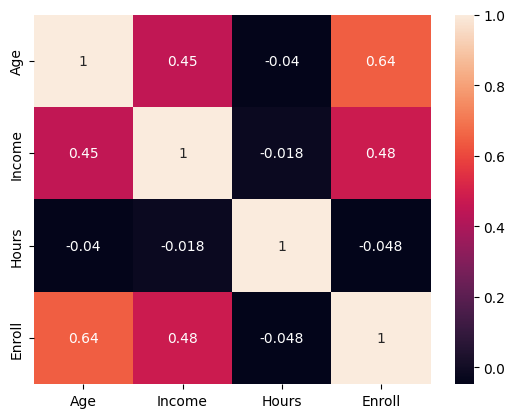

In [ ]:
corr= dx.corr()
print("Esta es la matriz de la correlacion:\n", corr)
sns.heatmap(corr, annot=True)

# Modelo KNN

In [ ]:
xd= np.array(dx.iloc[:,0:3]) #Variables de entrada
yd= np.array(dx.iloc[:,3]) #Variable de salida

mknn= KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(xd,yd) #Se ajusta el modelo
ydp= mknn.predict(xd)

#Matriz de confusión
cm= confusion_matrix(yd, ydp)
print("Esta es la matriz de confusión:\n", cm)

VN= cm[0,0]; FP= cm[0,1]; FN= cm[1,0]; VP= cm[1,1]

#Metricas
print("Exactitud=", round((VP+VN)/(VP+VN+FP+FN)*100, 2), '%')
print("Sensibilidad=", round(VP/(VP+FN)*100, 2), '%')
print("Especificidad=", round(VN/(VN+FP)*100, 2), '%')


Esta es la matriz de confusión:
 [[538  59]
 [145 258]]
Exactitud= 79.6 %
Sensibilidad= 64.02 %
Especificidad= 90.12 %


In [ ]:
#Modelo para nuevo cliente del FITNESS CENTER con el modelo KNN
#Age; Income; Hours -> 26, 800, 15

XDP= np.array([[26, 800, 15]])
ydp1= mknn.predict(XDP)

if ydp1[0] == 1:
    print("Si va a comprar la membresia") #=1
else:
    print("No va a comprar la membresia") #=0


No va a comprar la membresia


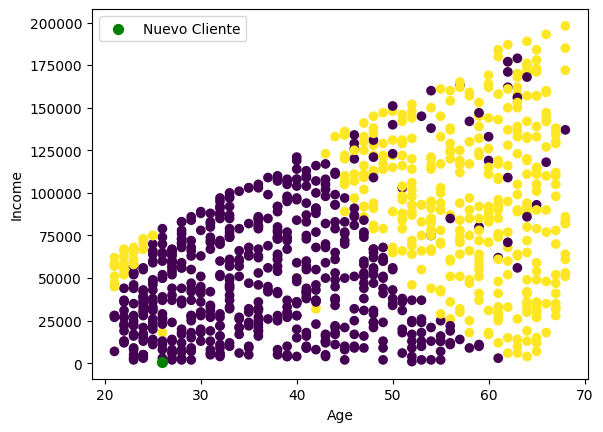

In [ ]:
#Ubicación en la grafica para el nuevo cliente del Fitness Center Modelo KNN
plt.scatter(xd[:,0], xd [:,1],c=yd,cmap="viridis")
plt.scatter(XDP [: ,0], XDP [: ,1], marker='o', s=50, facecolors= 'green', label="Nuevo Cliente") #Nuevo cliente
plt.xlabel("Age"); plt.ylabel("Income"); plt.legend()
plt.show()

# Modelo K-Means

In [ ]:
np.random.seed (42)

mkm=KMeans(n_clusters=5, init= 'random', random_state=42) #se hace mejor con 5 cluster
mkm.fit(xd, yd)
labels=mkm.labels_
print('La primera persona quedo en el Cluster:', labels[0,])
print('La segunda persona quedo en el Cluster:', labels[1,])
print('La tercera persona quedo en el Cluster:', labels[2,])
print('La cuarta persona quedo en el Cluster:', labels[3,])



La primera persona quedo en el Cluster: 3
La segunda persona quedo en el Cluster: 3
La tercera persona quedo en el Cluster: 1
La cuarta persona quedo en el Cluster: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Modelo para nuevo cliente del FITNESS CENTER con el modelo K-Means
#Age; Income; Hours -> 26, 800, 15

XDP2= np.array([[26,800, 15]])
ydp2=mkm.predict(XDP2)
print('El cliente potencial del Fitness Center quedo en el cluster:', ydp2)

if ydp2[0] == 1:
    print("Si va a comprar la membresia")
else:
    print("No va a comprar la membresia")

El cliente potencial del Fitness Center quedo en el cluster: [3]
No va a comprar la membresia


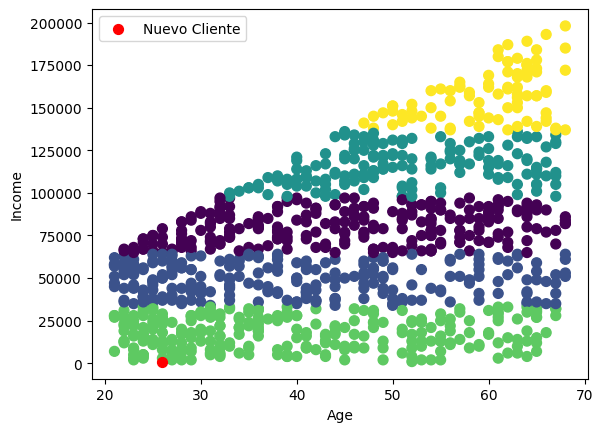

In [ ]:
#Ubicación en la grafica para el nuevo cliente del Fitness Center Modelo M-KMeans
plt.scatter(xd[:,0], xd [:,1],c=labels, s=50, cmap="viridis")
plt.scatter(XDP2 [: ,0], XDP2 [: ,1], marker='o', s=50, facecolors= 'red', label= "Nuevo Cliente") #Nuevo cliente
plt.xlabel("Age"); plt.ylabel("Income"); plt.legend()
plt.show()

In [ ]:
#Porcentaje de inscripcion y no inscripcion de cada cluster

# Cluster 0
c0 = len(np.where((labels == 0) & (yd == 0))[0])
c01 = len(np.where((labels == 0) & (yd == 1))[0])

print('El porcentaje de que No compra la membresia del gimnasio para el cluster 0 es:', round(c0 / (c0 + c01) * 100, 2), '%')
print("El porcentaje de que compra la membresia del gimnasio para el cluster 0 es:", round(c01 / (c0 + c01) * 100, 2), '%')

# Cluster 1
c10 = len(np.where((labels == 1) & (yd == 0))[0])
c11 = len(np.where((labels == 1) & (yd == 1))[0])

print('El porcentaje de que No compra la membresia del gimnasio para el cluster 1 es:', round(c10 / (c10 + c11) * 100, 2), '%')
print("El porcentaje de que compra la membresia del gimnasio para el cluster 1 es:", round(c11 / (c10 + c11) * 100, 2), '%')

# Cluster 2
c20 = len(np.where((labels == 2) & (yd == 0))[0])
c21 = len(np.where((labels == 2) & (yd == 1))[0])

print('El porcentaje de que No compra la membresia del gimnasio para el cluster 2 es:', round(c20 / (c20 + c21) * 100, 2), '%')
print("El porcentaje de que compra la membresia del gimnasio para el cluster 2 es:", round(c21 / (c20 + c21) * 100, 2), '%')

# Cluster 3
c30 = len(np.where((labels == 3) & (yd == 0))[0])
c31 = len(np.where((labels == 3) & (yd == 1))[0])

print('El porcentaje de que No compra la membresia del gimnasio para el cluster 3 es:', round(c30 / (c30 + c31) * 100, 2), '%')
print("El porcentaje de que compra la membresia del gimnasio para el cluster 3 es:", round(c31 / (c30 + c31) * 100, 2), '%')

c40 = len(np.where((labels == 4) & (yd == 0))[0])
c41 = len(np.where((labels == 4) & (yd == 1))[0])

print('El porcentaje de que No compra la membresia del gimnasio para el cluster 4 es:', round(c40 / (c40 + c41) * 100, 2), '%')
print("El porcentaje de que compra la membresia del gimnasio para el cluster 4 es:", round(c41 / (c40 + c41) * 100, 2), '%')

El porcentaje de que No compra la membresia del gimnasio para el cluster 0 es: 52.85 %
El porcentaje de que compra la membresia del gimnasio para el cluster 0 es: 47.15 %
El porcentaje de que No compra la membresia del gimnasio para el cluster 1 es: 72.27 %
El porcentaje de que compra la membresia del gimnasio para el cluster 1 es: 27.73 %
El porcentaje de que No compra la membresia del gimnasio para el cluster 2 es: 31.85 %
El porcentaje de que compra la membresia del gimnasio para el cluster 2 es: 68.15 %
El porcentaje de que No compra la membresia del gimnasio para el cluster 3 es: 84.87 %
El porcentaje de que compra la membresia del gimnasio para el cluster 3 es: 15.13 %
El porcentaje de que No compra la membresia del gimnasio para el cluster 4 es: 17.05 %
El porcentaje de que compra la membresia del gimnasio para el cluster 4 es: 82.95 %


In [ ]:
#Se inscriben al gimnasio por cada cluster
print("Cantidad de individuos que se inscribiran al gimnasio en el cluster 0:", c01)
print("Cantidad de individuos que NO inscribiran al gimnasio en el cluster 0:", c0)
print("Cantidad de individuos que se inscribiran al gimnasio en el cluster 1:", c11)
print("Cantidad de individuos que NO inscribiran al gimnasio en el cluster 1:", c10)
print("Cantidad de individuos que se inscribiran al gimnasio en el cluster 2:", c21)
print("Cantidad de individuos que NO inscribiran al gimnasio en el cluster 2:", c20)
print("Cantidad de individuos que se inscribiran al gimnasio en el cluster 3:", c31)
print("Cantidad de individuos que NO inscribiran al gimnasio en el cluster 3:", c30)
print("Cantidad de individuos que se inscribiran al gimnasio en el cluster 4:", c41)
print("Cantidad de individuos que NO inscribiran al gimnasio en el cluster 4:", c40)

Cantidad de individuos que se inscribiran al gimnasio en el cluster 0: 116
Cantidad de individuos que NO inscribiran al gimnasio en el cluster 0: 130
Cantidad de individuos que se inscribiran al gimnasio en el cluster 1: 66
Cantidad de individuos que NO inscribiran al gimnasio en el cluster 1: 172
Cantidad de individuos que se inscribiran al gimnasio en el cluster 2: 107
Cantidad de individuos que NO inscribiran al gimnasio en el cluster 2: 50
Cantidad de individuos que se inscribiran al gimnasio en el cluster 3: 41
Cantidad de individuos que NO inscribiran al gimnasio en el cluster 3: 230
Cantidad de individuos que se inscribiran al gimnasio en el cluster 4: 73
Cantidad de individuos que NO inscribiran al gimnasio en el cluster 4: 15


In [ ]:
#Cual es la carcateristica sociodemografica de cada cluster.
#[AGE|INCOME|HOURS]

np.set_printoptions(suppress=True, precision=2)

clusters = mkm.cluster_centers_
clusters = np.round(clusters, 2) #redondear a dos decimales

# Imprimir las características sociodemográficas de cada cluster
print("Esta es la característica sociodemográfica de cada cluster:\n", clusters)


Esta es la característica sociodemográfica de cada cluster:
 [[    44.86  80146.34     10.33]
 [    39.75  49365.55     10.28]
 [    51.26 115770.7       9.81]
 [    39.69  17760.15     10.19]
 [    60.03 157795.45     10.14]]


In [ ]:
# Numero de clientes en cada cluster
cluster_counts = np.bincount(labels)

# Cluster con mayor edad, mayores ingresos, mayores horas
maxagec = np.argmax(clusters[:, 0])
maxincomec = np.argmax(clusters[:, 1])
maxhoursc = np.argmax(clusters[:, 2])

# Resultados
for i, count in enumerate(cluster_counts):
  print(f"Clúster {i}: {count} individuos")

print(f"Clúster con mayor edad: {maxagec}")
print(f"Clúster con mayores ingresos: {maxincomec}")
print(f"Clúster con mayor número de horas en el gimnasio: {maxhoursc}")

Clúster 0: 246 individuos
Clúster 1: 238 individuos
Clúster 2: 157 individuos
Clúster 3: 271 individuos
Clúster 4: 88 individuos
Clúster con mayor edad: 4
Clúster con mayores ingresos: 4
Clúster con mayor número de horas en el gimnasio: 0


# **ANALISIS DE RESULTADOS**


La variable Age (Edad) se destaca como el factor más influyente en la inscripción al gimnasio, con una correlación de 0.644 con la variable Enroll (Inscripcion), seguida de Income (Ingresos anuales) con una correlación de 0.476. Esto sugiere que la edad y los ingresos son determinantes clave en la decisión de compra de la membresía, mientras que las horas de ejercicio semanales (hours) tienen poca relevancia.

El modelo KNN, con una exactitud del 79.6%, una sensibilidad del 64.02% y una especificidad del 90.12%, predice de manera más precisa quién no comprará la membresía. Para un cliente con 26 años, 800  de ingresos anuales y 15 horas de ejercicio semanales, ambos modelos (KNN y K-Means) predicen que no comprará la membresía.

En cuanto al modelo K-Means, aunque el Cluster 4 tiene las personas con mayores ingresos y edad promedio, el Cluster 0 es el que verá la mayor cantidad de inscripciones, con 116 personas que comprarán la membresía, más que cualquier otro clúster. Esto es significativo, ya que aunque el clúster tiene una distribución equilibrada entre inscritos (47%) y no inscritos (53%), sigue representando el grupo más numeroso en cuanto a inscripciones.

En conclusión, el análisis confirma que la edad y los ingresos son los principales factores que influyen en la decisión de inscripción al gimnasio, con la edad siendo la variable más influyente. El modelo KNN demuestra ser efectivo para predecir con precisión a los usuarios que no comprarán la membresía, mientras que el modelo K-Means identifica que, a pesar de que el Cluster 4 agrupa a las personas con mayores ingresos y edad, es el Cluster 0 el que tendrá la mayor cantidad de inscripciones.